<a href="https://colab.research.google.com/github/Renata-Thomazelli/mentoria2021/blob/main/temperatura_media_analise_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>**Analisando Temperatura média**<font>

---

## <font color='blue'>Importing the Data

---

In [40]:
# Importing Drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
#Importing the packages 
import pandas as pd
import numpy as np
import chardet
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

<font color='blue'> Reading CSV

In [42]:
file_path ='/content/drive/MyDrive/Data_Lake/temperatura_preciptacao/'
tipo = 'tas_'
anos ='1901_2020_'
pais = "USA"

file = f"{tipo}{anos}{pais}.csv"

In [43]:
with open(f"{file_path}{file}", 'rb') as encoding:
    r_encoding = chardet.detect(encoding.read(100000))
r_encoding

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

In [44]:
arquivo = f"{tipo}{pais}"
with open (f"{file_path}{file}",'r',encoding=r_encoding['encoding']) as arquivo :
  df_tas = pd.read_csv(arquivo)

<font color='blue'> DataFrame

In [45]:
df_tas

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-5.5,1901,Jan Average,United States,USA
1,-6.4,1901,Feb Average,United States,USA
2,-0.1,1901,Mar Average,United States,USA
3,4.8,1901,Apr Average,United States,USA
4,12.1,1901,May Average,United States,USA
...,...,...,...,...,...
1435,20.3,2020,Aug Average,United States,USA
1436,15.3,2020,Sep Average,United States,USA
1437,8.3,2020,Oct Average,United States,USA
1438,2.6,2020,Nov Average,United States,USA


In [46]:
#Dataframe size
df_tas.shape

(1440, 5)

In [47]:
#Dataframe informations
df_tas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature - (Celsius)  1440 non-null   float64
 1    Year                    1440 non-null   int64  
 2    Statistics              1440 non-null   object 
 3    Country                 1440 non-null   object 
 4    ISO3                    1440 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 56.4+ KB


In [48]:
#identifying coluns's names
df_tas.columns

Index(['Temperature - (Celsius)', ' Year', ' Statistics', ' Country', ' ISO3'], dtype='object')

In [49]:
#cleaning columns names
colunas = [c.strip().lower().replace(" ","_") for c in df_tas.columns]
df_tas.columns = colunas
   

df_tas.head(5)

,temperature_-_(celsius),year,statistics,country,iso3
0,-5.5,1901,Jan Average,United States,USA
1,-6.4,1901,Feb Average,United States,USA
2,-0.1,1901,Mar Average,United States,USA
3,4.8,1901,Apr Average,United States,USA
4,12.1,1901,May Average,United States,USA


In [50]:
#checking columns' names after modifications
df_tas.columns

Index(['temperature_-_(celsius)', 'year', 'statistics', 'country', 'iso3'], dtype='object')

In [51]:
#defining a function to replace values inside the index column 
def replace (col): 
    return col.replace(" Average",'').strip()

In [52]:
 #creating a dict to redefining some columns' names
 renomeando = {'temperature_-_(celsius)':'temp_celsius', 'statistics':'month'}

In [53]:
#defining a function to create a conditional new column
def year_season(row):
    seasons = {"spring":["Mar","Apr","May"], 'summer':["Jun","Jul","Aug"],'autumn':['Sep',"Oct","Nov"],'winter':["Dec","Jan","Feb"]}
    key_list = list(seasons.keys())
    val_list = list(seasons.values())
    for meses in seasons.values():
        for m in meses:
            if m == row['month']:
                indice =val_list.index(meses)
                #print(indice,meses)
                #print(key_list[indice])
                return key_list[indice]

In [54]:
#Filtering years from 1960 onwards, cleaning and renaming columns
df_tas_test_season=\
(
    df_tas.loc[df_tas['year']>=1960,:]
    .rename(columns=renomeando)
    .set_index("month")
    .rename(index=replace)
    .reset_index()
    
    
)

df_tas_test_season

,month,temp_celsius,year,country,iso3
0,Jan,-6.0,1960,United States,USA
1,Feb,-4.4,1960,United States,USA
2,Mar,-2.5,1960,United States,USA
3,Apr,5.9,1960,United States,USA
4,May,12.1,1960,United States,USA
...,...,...,...,...,...
727,Aug,20.3,2020,United States,USA
728,Sep,15.3,2020,United States,USA
729,Oct,8.3,2020,United States,USA
730,Nov,2.6,2020,United States,USA


In [55]:
#Including the conditional column: season
df_tas_season =df_tas_test_season.assign(season = df_tas_test_season.apply(year_season,axis=1))



In [56]:
df_tas_season

,month,temp_celsius,year,country,iso3,season
0,Jan,-6.0,1960,United States,USA,winter
1,Feb,-4.4,1960,United States,USA,winter
2,Mar,-2.5,1960,United States,USA,spring
3,Apr,5.9,1960,United States,USA,spring
4,May,12.1,1960,United States,USA,spring
...,...,...,...,...,...,...
727,Aug,20.3,2020,United States,USA,summer
728,Sep,15.3,2020,United States,USA,autumn
729,Oct,8.3,2020,United States,USA,autumn
730,Nov,2.6,2020,United States,USA,autumn


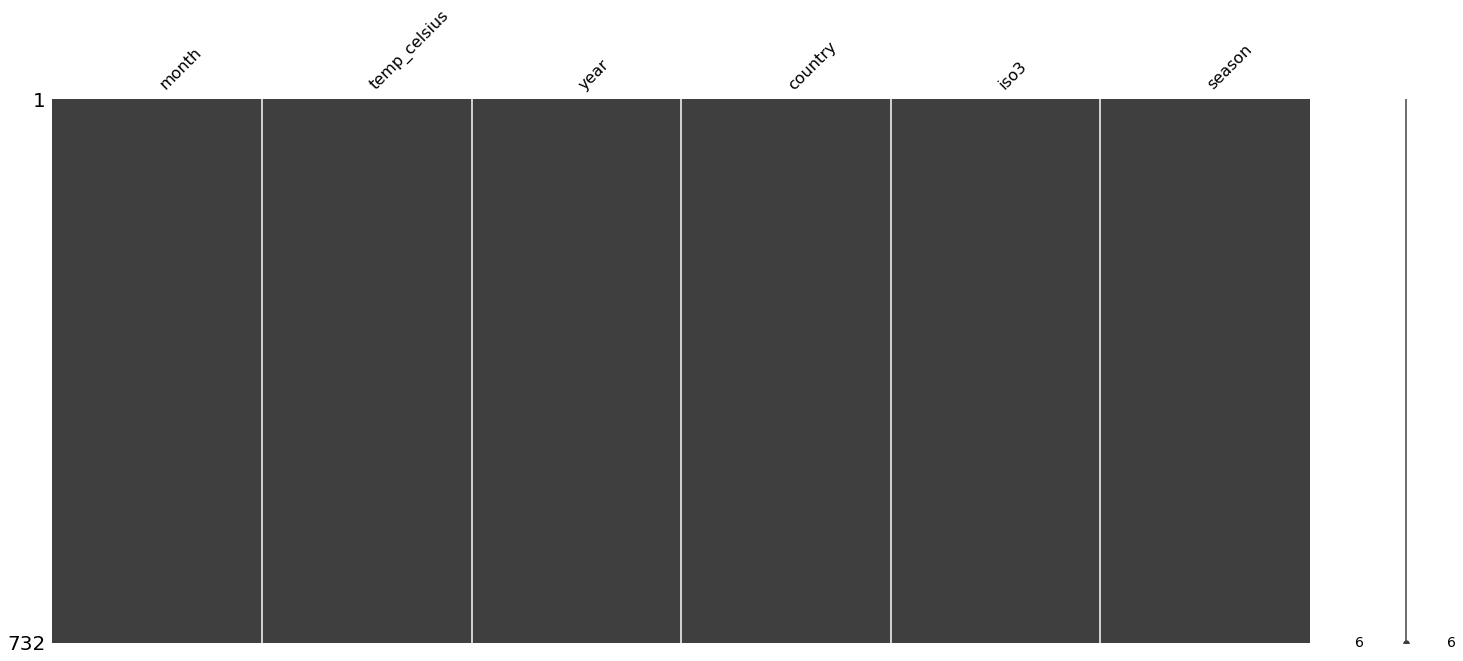

In [57]:
#Verifying NAN values
msno.matrix(df_tas_season)

In [58]:
df_tas_season.to_csv(f"{tipo}{anos}{pais}_seasons.csv")

## <font color="blue">Improving the memory usage

---

In [59]:
#Verifying the shape
df_tas_season.shape


(732, 6)

In [60]:
#Verifying types and memory usage
original_info = df_tas_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         732 non-null    object 
 1   temp_celsius  732 non-null    float64
 2   year          732 non-null    int64  
 3   country       732 non-null    object 
 4   iso3          732 non-null    object 
 5   season        732 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 34.4+ KB


In [61]:
#Verifying memory usage
original_mem = df_tas_season.memory_usage(deep=True)


In [62]:
#Checking the low cardinality
df_tas_season.select_dtypes(include=["object"]).nunique()

month      12
country     1
iso3        1
season      4
dtype: int64

In [63]:
#Changing the columns types
col_to_category = ['month',"country","iso3","season"]

df_tas_season["year"]= df_tas_season["year"].astype("int32")
df_tas_season[col_to_category]=df_tas_season[col_to_category].astype("category")

df_tas_season

,month,temp_celsius,year,country,iso3,season
0,Jan,-6.0,1960,United States,USA,winter
1,Feb,-4.4,1960,United States,USA,winter
2,Mar,-2.5,1960,United States,USA,spring
3,Apr,5.9,1960,United States,USA,spring
4,May,12.1,1960,United States,USA,spring
...,...,...,...,...,...,...
727,Aug,20.3,2020,United States,USA,summer
728,Sep,15.3,2020,United States,USA,autumn
729,Oct,8.3,2020,United States,USA,autumn
730,Nov,2.6,2020,United States,USA,autumn


## <font color='blue'>Comparing Memory Usage

In [64]:
#Verifying new memory usage
new_memory = df_tas_season.memory_usage(deep=True)


In [65]:
# Comparying memory usage
old_value ='\033[91m'
new_value ='\033[1;32m'
normal_value = '\033[0m'
print(old_value + "This is the original memory usage" + normal_value)
print(original_mem)
print(new_value + "\nAnd this is the new memory usage" + normal_value)
print(new_memory)


This is the original memory usage
Index             128
month           43920
temp_celsius     5856
year             5856
country         51972
iso3            44652
season          46116
dtype: int64

And this is the new memory usage
Index            128
month           1772
temp_celsius    5856
year            2928
country          883
iso3             873
season          1144
dtype: int64


In [66]:
#Checking new info data
new_info = df_tas_season.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   month         732 non-null    category
 1   temp_celsius  732 non-null    float64 
 2   year          732 non-null    int32   
 3   country       732 non-null    category
 4   iso3          732 non-null    category
 5   season        732 non-null    category
dtypes: category(4), float64(1), int32(1)
memory usage: 12.3 KB


In [67]:
#Checking the describe method
df_tas_season['temp_celsius'].describe().T

count    732.000000
mean       7.202596
std        9.184359
min       -8.500000
25%       -1.350000
50%        7.300000
75%       16.250000
max       21.400000
Name: temp_celsius, dtype: float64

## <font color="blue"> *PLOTTING YEARS*

In [68]:
#Defining the df to chart
df_tas_season_chart =\
(
    df_tas_season.set_index("month")
)

df_tas_season_chart

,temp_celsius,year,country,iso3,season
month,,,,,
Jan,-6.0,1960,United States,USA,winter
Feb,-4.4,1960,United States,USA,winter
Mar,-2.5,1960,United States,USA,spring
Apr,5.9,1960,United States,USA,spring
May,12.1,1960,United States,USA,spring
...,...,...,...,...,...
Aug,20.3,2020,United States,USA,summer
Sep,15.3,2020,United States,USA,autumn
Oct,8.3,2020,United States,USA,autumn


In [69]:
#Importing the package and defining the colors to plot
import matplotlib.dates as mdt
blue = '#99ddee'
white = '#ffffff'

In [70]:
#Defining the plot's function
def plot_year(ax,temp,years):
    ax.set_facecolor(blue)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    filtro_1 = df_tas_season_chart.year == y
    ax.plot(df_tas_season_chart.index[filtro_1],df_tas_season_chart.loc[filtro_1,'temp_celsius'].values)
    ax.tick_params(axis='x', colors=white)
    ax.tick_params(axis='y', colors=white)
    ax.set_ylabel('Celsius Temperature', color=white)
    ax.set_title(f"Year {y}", color=white, fontweight='bold')
    ax.fill_between(df_tas_season_chart.index,min(df_tas_season_chart['temp_celsius']), max(df_tas_season_chart['temp_celsius'])+5,  facecolor='white' )


In [71]:
df_tas_season_chart_x = df_tas_season_chart.reset_index()

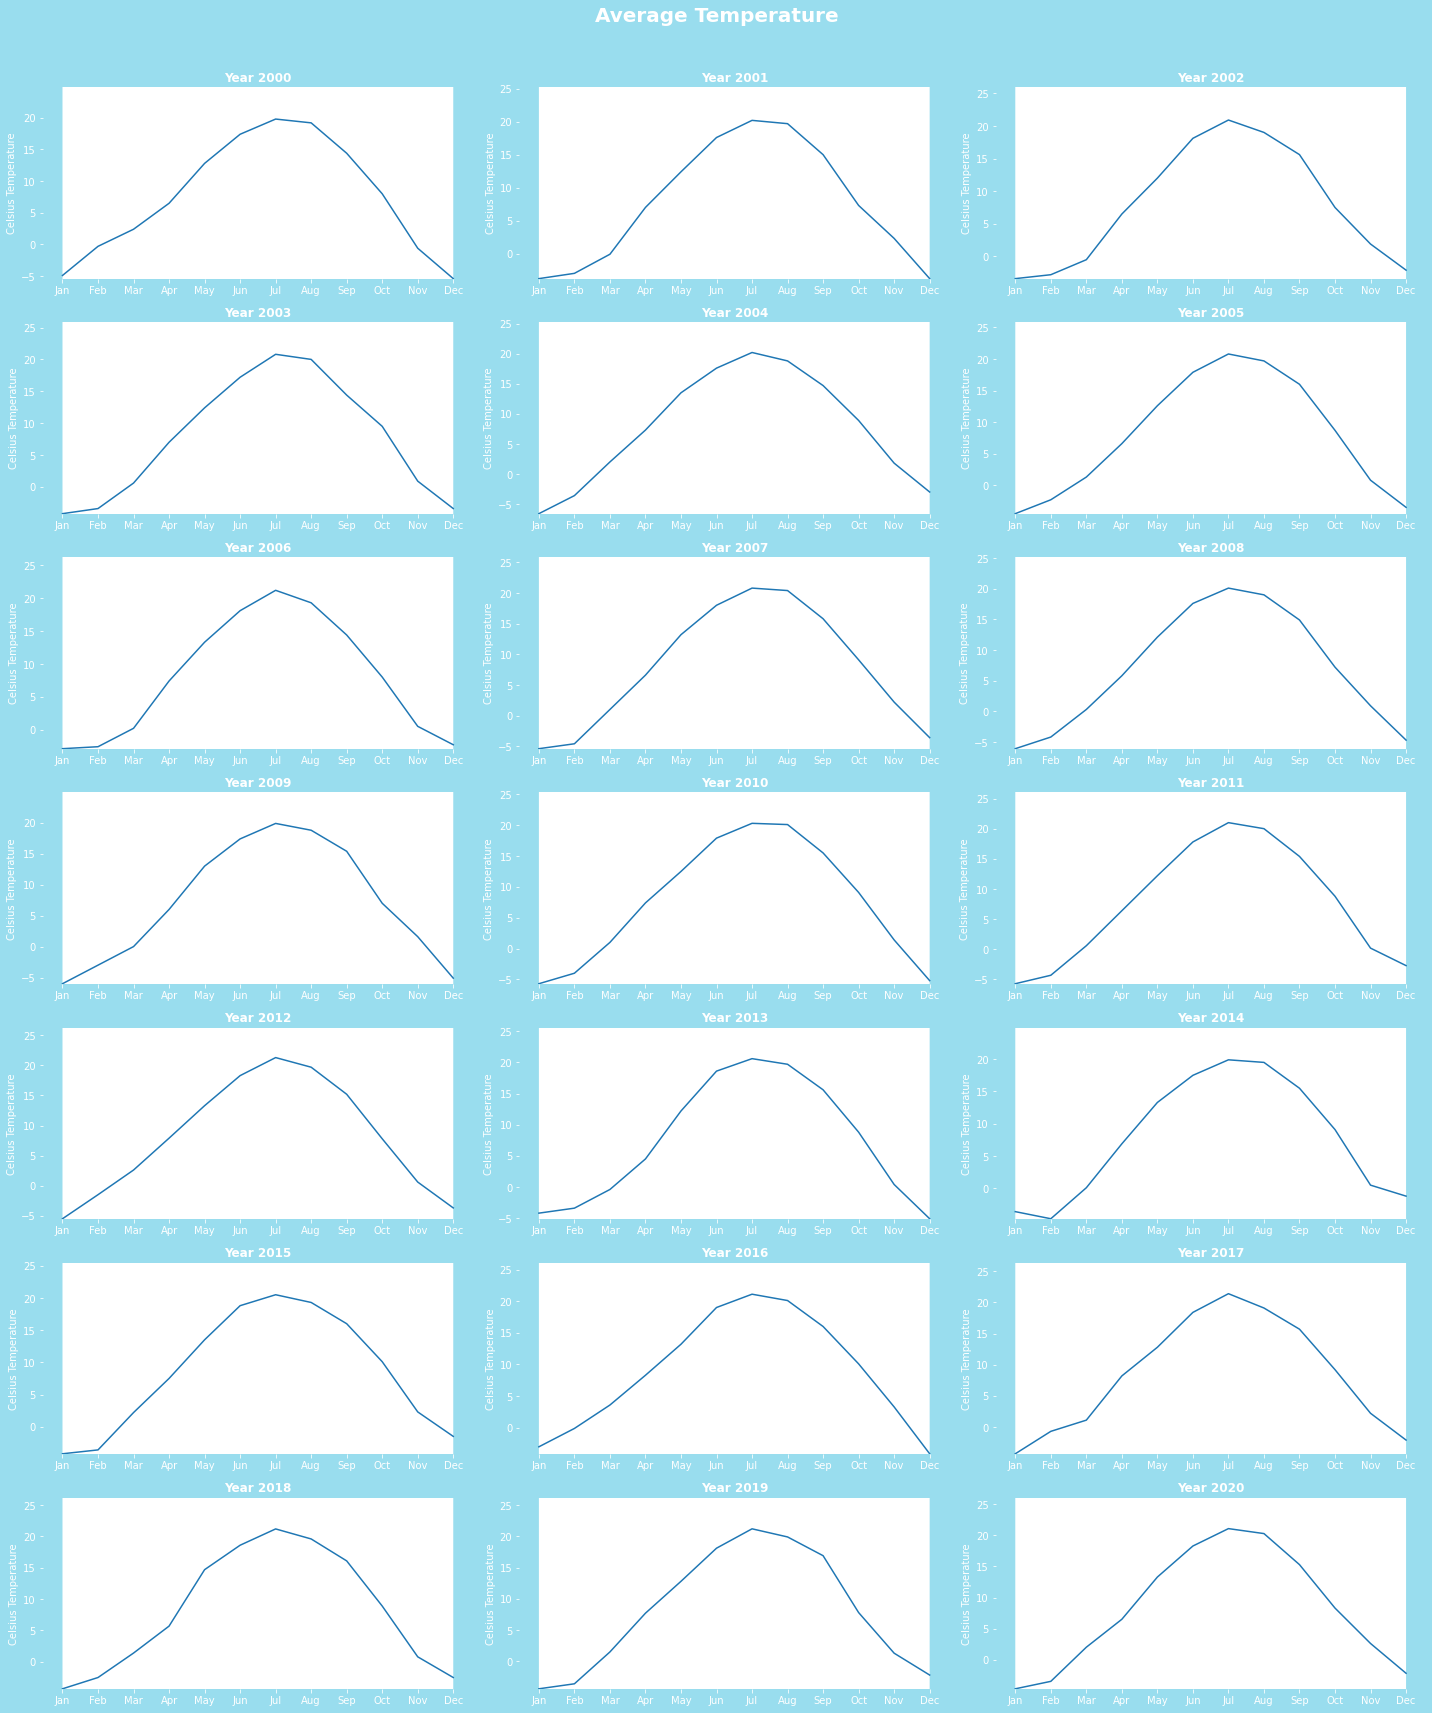

In [72]:
#Ploting the years
years = range(2000,2020+1)
fig, axs = plt.subplots(ncols =3, nrows = int(len(years)/3),figsize=(20,25), linewidth = 5, facecolor = blue)

axs = axs.flatten()
max_val = None
max_data = None
max_ax = None
for i, y in enumerate(years):

    ax= axs[i]
 
    data_1=\
    (
        df_tas_season_chart_x.assign(YEAR=pd.to_datetime(df_tas_season_chart_x.year))
        .set_index("year")
        .loc[y]
        .temp_celsius
        .interpolate()  
    )
 

    if max_val is None or max_val < data_1.max():
        max_val = data_1.max()
        max_data = data_1
        max_ax = ax

    ax.set_ylim(min(data_1.values), max((data_1.values))+5)
    years = {y}
    plot_year(ax, data_1, years)


fig.suptitle('Average Temperature', color='white', fontweight='bold',fontsize=20 )
fig.tight_layout( rect= [0,0.03, 1, 0.95])
fig.savefig(f'Average Temperature by Year {pais}.png', dpi=300, facecolor=blue)



## <font color="blue">*PLOTTING QUARTILES*

In [73]:
#Defining data to General Quartile
box_plot= df_tas_season['temp_celsius'].describe()[['min','25%','50%','75%','max']].round(2)
box_plot

min    -8.50
25%    -1.35
50%     7.30
75%    16.25
max    21.40
Name: temp_celsius, dtype: float64

In [74]:
#Defining data to Seasons' Quartile
temp_season = ['temp_celsius','season']
df_temp_season= df_tas_season[temp_season]


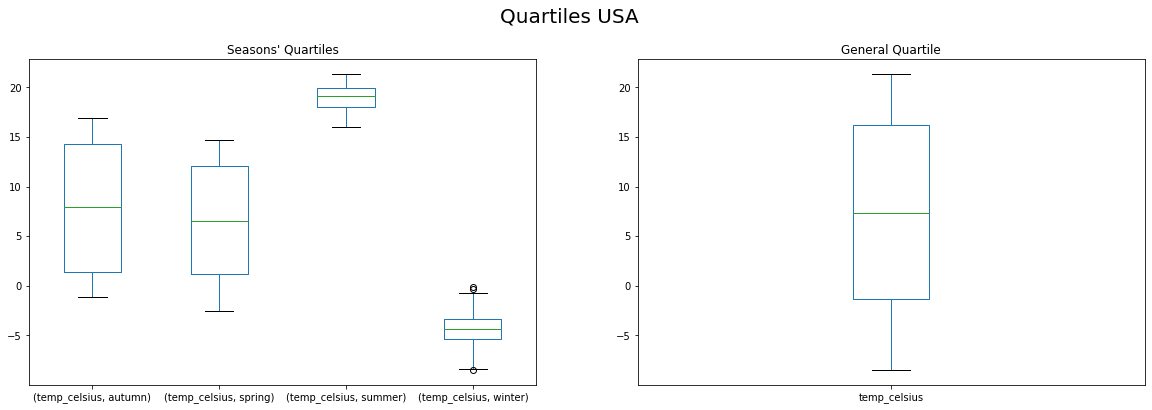

In [79]:
#Ploting Quartiles
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,6))
fig.suptitle(f"Quartiles {pais}", size=20, y=1.00)
df_temp_season.pivot(columns='season').plot.box(ax=ax1,title="Seasons' Quartiles")
box_plot.plot.box(ax=ax2, title="General Quartile")
fig.savefig(f"{pais} Seasons'Quartiles")

In [76]:
box_plot.to_csv(f"{pais}_General_Quartile.csv")

In [77]:
quartil_temp_seasons=\
(
    df_temp_season.pivot(columns='season')
    .describe()
    .loc[['min','25%','50%','75%',"max"]]
    .round(2)
 
     
)
quartil_temp_seasons

temp_celsius                     
season       autumn spring summer winter
min           -1.10  -2.50  16.00   -8.5
25%            1.40   1.20  18.00   -5.4
50%            7.90   6.50  19.10   -4.4
75%           14.25  12.05  19.95   -3.4
max           16.90  14.70  21.40   -0.1

In [78]:
quartil_temp_seasons.to_csv(f"{pais}_Seasons' Quartiles.csv")